In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [44]:
np.random.seed(0)

In [58]:
n_pts = 500
X,y = datasets.make_circles(n_samples=n_pts,random_state=123,noise=0.1,factor=0.2)
print(X[:5],y[:5])

[[ 0.69855363 -0.37828961]
 [-0.24842242  0.19107122]
 [-0.17875904  0.25369748]
 [-0.00730467 -0.25926669]
 [-0.15984414  0.26691592]] [0 1 1 1 1]


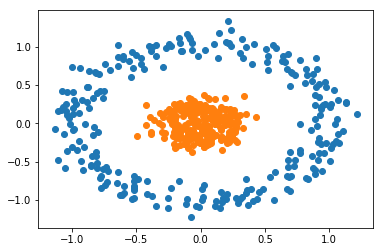

In [46]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [48]:
model = Sequential()
model.add(Dense(4,input_shape=(2,),activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(Adam(lr=0.01),'binary_crossentropy',metrics=['accuracy'])

In [49]:
h = model.fit(x=X,y=y,batch_size=50,epochs=100,verbose=1,shuffle='true')

Epoch 1/100
500/500 [==============================] - 0s 496us/step - loss: 0.7039 - acc: 0.4760
Epoch 2/100
500/500 [==============================] - 0s 69us/step - loss: 0.6930 - acc: 0.3740
Epoch 3/100
500/500 [==============================] - 0s 65us/step - loss: 0.6923 - acc: 0.6180
Epoch 4/100
500/500 [==============================] - 0s 56us/step - loss: 0.6929 - acc: 0.6800
Epoch 5/100
500/500 [==============================] - 0s 71us/step - loss: 0.6925 - acc: 0.6740
Epoch 6/100
500/500 [==============================] - 0s 70us/step - loss: 0.6918 - acc: 0.5660
Epoch 7/100
500/500 [==============================] - 0s 71us/step - loss: 0.6911 - acc: 0.4380
Epoch 8/100
500/500 [==============================] - 0s 65us/step - loss: 0.6906 - acc: 0.4720
Epoch 9/100
500/500 [==============================] - 0s 55us/step - loss: 0.6900 - acc: 0.5720
Epoch 10/100
500/500 [==============================] - 0s 68us/step - loss: 0.6891 - acc: 0.6540
Epoch 11/100
500/500 [======

500/500 [==============================] - 0s 58us/step - loss: 0.1267 - acc: 0.9960
Epoch 85/100
500/500 [==============================] - 0s 46us/step - loss: 0.1225 - acc: 0.9960
Epoch 86/100
500/500 [==============================] - 0s 64us/step - loss: 0.1186 - acc: 0.9960
Epoch 87/100
500/500 [==============================] - 0s 55us/step - loss: 0.1148 - acc: 0.9980
Epoch 88/100
500/500 [==============================] - 0s 65us/step - loss: 0.1112 - acc: 0.9980
Epoch 89/100
500/500 [==============================] - 0s 60us/step - loss: 0.1077 - acc: 0.9980
Epoch 90/100
500/500 [==============================] - 0s 65us/step - loss: 0.1044 - acc: 0.9980
Epoch 91/100
500/500 [==============================] - 0s 50us/step - loss: 0.1014 - acc: 0.9980
Epoch 92/100
500/500 [==============================] - 0s 52us/step - loss: 0.0984 - acc: 0.9980
Epoch 93/100
500/500 [==============================] - 0s 60us/step - loss: 0.0956 - acc: 0.9980
Epoch 94/100
500/500 [===========

Text(0.5,0,'epoch')

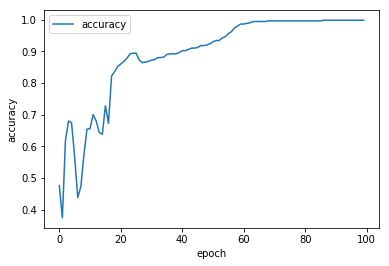

In [50]:
plt.plot(h.history['acc'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

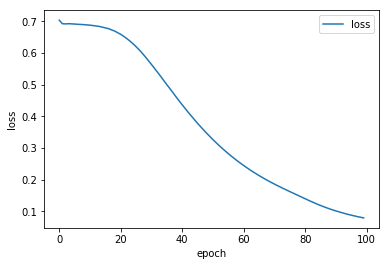

In [51]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [57]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

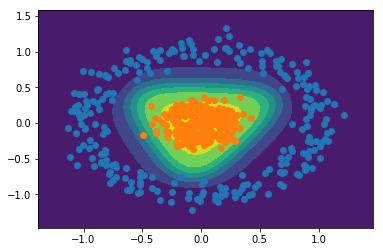

In [53]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

Prediction is:  [[0.1634787]]


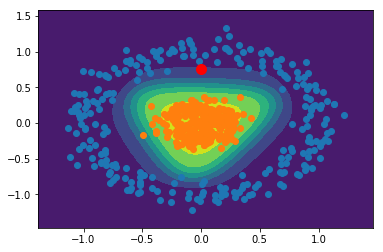

In [59]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

p = 0
q = 0.75
point = np.array([[p, q]])
predict = model.predict(point)
plt.plot([p], [q], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)

Prediction is:  [[0.9585736]]


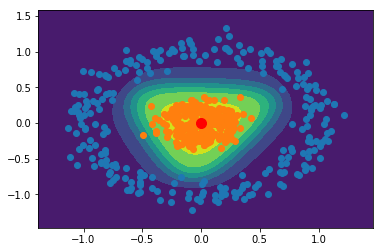

In [60]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

p = 0
q = 0
point = np.array([[p, q]])
predict = model.predict(point)
plt.plot([p], [q], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)